# Feature Engineering and Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)  #reduced display precision on numpy arrays

Out of the box, linear regression provides a means of building models of the form:
𝑓𝐰,𝑏=𝑤0𝑥0+𝑤1𝑥1+...+𝑤𝑛−1𝑥𝑛−1+𝑏(1)
What if our features/data are non-linear or are combinations of features? For example, Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters  𝐰
 ,  𝐛
  in (1) to 'fit' the equation to the training data. However, no amount of adjusting of  𝐰
 , 𝐛
  in (1) will achieve a fit to a non-linear curve.

# Polynomial Features
Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic:  𝑦=1+𝑥2
 
You're familiar with all the routines we're using. They are available in the lab_utils.py file for review. We'll use np.c_[..] which is a NumPy routine to concatenate along the column boundary.

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


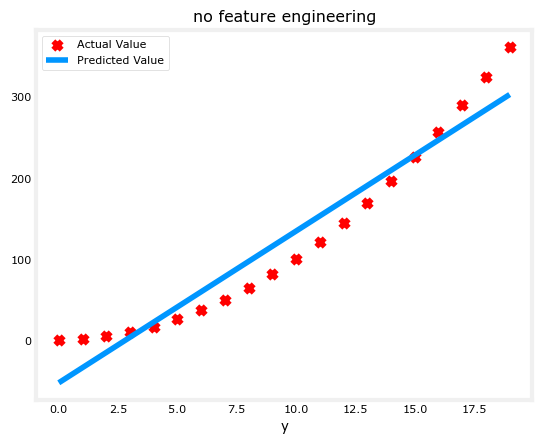

In [3]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1,1)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha= 1e-2)

plt.scatter(x, y, marker="x", c = "r",label= "Actual Value");plt.title("no feature engineering")
plt.plot(x, X@model_w + model_b, label= "Predicted Value"); plt.xlabel("y");plt.legend()

Well, as expected, not a great fit. What is needed is  a polynomial feature.

In [4]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

#Engineer features
X = x**2  #<-- added engineered feature

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


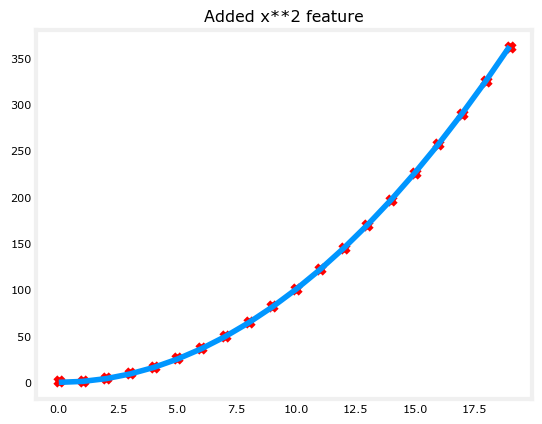

In [5]:
X = X.reshape(-1, 1)  #X should be a 2-D Matrix
model_w,model_b = run_gradient_descent_feng(X, y, iterations= 10000, alpha = 1e-5)

plt.scatter(x, y, marker="x", c= "r", label= "Actual Value");plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value")

Great! near perfect fit. Notice the values of  𝐰
  and b printed right above the graph: w,b found by gradient descent: w: [1.], b: 0.0490

Selecting Features
Above, we knew that an  𝑥2
  term was required. It may not always be obvious which features are required. One could add a variety of potential features to try and find the most useful. For example, what if we had instead tried :  𝑦= 𝑤0𝑥0+𝑤1𝑥1^2 + 𝑤2𝑥2^3 +𝑏
  ?

In [7]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

#engineer features.
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


<function matplotlib.pyplot.show(close=None, block=None)>

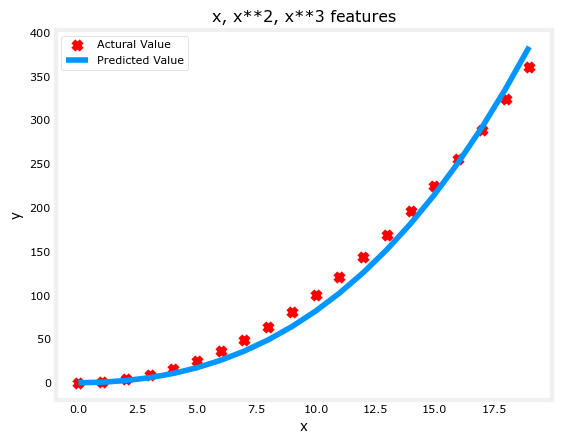

In [8]:
model_w, model_b = run_gradient_descent_feng(X, y, iterations= 10000, alpha= 1e-7)

plt.scatter(x, y, marker = "x", c = "r", label="Actural Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label= "Predicted Value") ; plt.xlabel("x"); plt.ylabel("y"); plt.legend();plt.show

### An Alternate View
Above, polynomial features were chosen based on how well they matched the target data. Another way to think about this is to note that we are still using linear regression once we have created new features. Given that, the best features will be linear relative to the target. This is best understood with an example. 

In [9]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

#engineer features .
X = np.c_[x, x**2, x**3]  #<-- added engineered feature
X_features = ["x", "x^2", "x^3"]

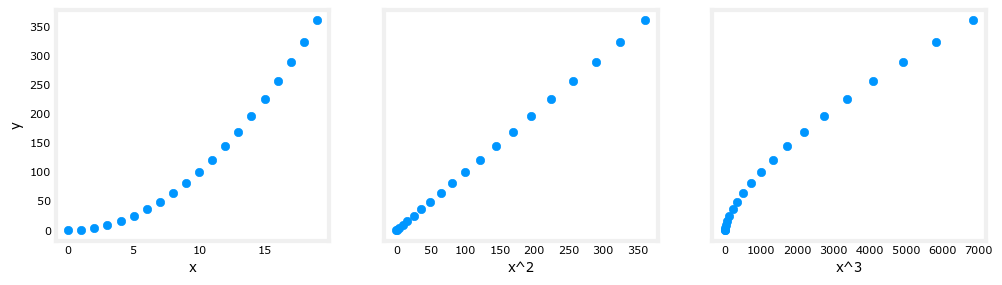

In [10]:
fig, ax = plt.subplots(1,3, figsize=(12, 3), sharey = True)
for i in range (len(ax)):
    ax[i].scatter(X[:, i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

Above, it is clear that the 𝑥2
 feature mapped against the target value 𝑦
 is linear. Linear regression can then easily generate a model using that feature.

### Scaling features
As described in the last lab, if the data set has features with significantly different scales, one should apply feature scaling to speed gradient descent. In the example above, there is  𝑥
 ,  𝑥2
  and  𝑥3
  which will naturally have very different scales. Let's apply Z-score normalization to our example.

In [14]:
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X, axis= 0)}")

#add mean_normalization
X = zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X, axis = 0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


Now we can try again with a more aggressive value of alpha:

Iteration         0, Cost: 9.42147e+03
Iteration      1000, Cost: 4.21521e+00
Iteration      2000, Cost: 3.23649e+00
Iteration      3000, Cost: 2.48501e+00
Iteration      4000, Cost: 1.90802e+00
Iteration      5000, Cost: 1.46500e+00
Iteration      6000, Cost: 1.12484e+00
Iteration      7000, Cost: 8.63665e-01
Iteration      8000, Cost: 6.63131e-01
Iteration      9000, Cost: 5.09160e-01
w,b found by gradient descent: w: [ 7.67 93.95 12.29], b: 123.5000


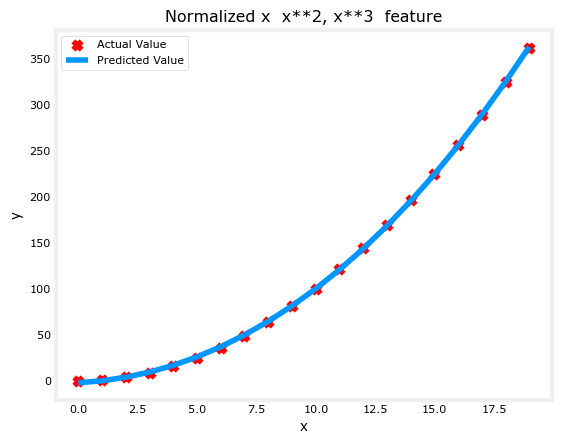

In [19]:
x = np.arange(0, 20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-1)

plt.scatter(x, y, marker="x", c="r", label="Actual Value"); plt.title("Normalized x  x**2, x**3  feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Feature scaling allows this to converge much faster.
Note again the values of  𝐰
 . The  𝑤1
  term, which is the  𝑥2
  term is the most emphasized. Gradient descent has all but eliminated the  𝑥3
  term.

### Complex Functions
With feature engineering, even quite complex functions can be modeled: